# Question 3
  
  What are the profits of the top grossing movie?

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

cleaning the movie budgets df to see which movies made the most profit

In [17]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [18]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [19]:
movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [20]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [21]:
# removing the "$" and the "," from the production_budget, domestic_gross,
# and worldwide_gross columns so that we can easily manipulate them


def convert_col_to_int(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").astype('int')
    return df

In [22]:
cols_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in cols_to_convert:
    movie_budgets = convert_col_to_int(movie_budgets, col)

In [23]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [24]:
movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [25]:
movie_budgets['profits'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profits
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [37]:
movie_budgets = movie_budgets.sort_values(by = ['profits'], ascending = False).head(10)

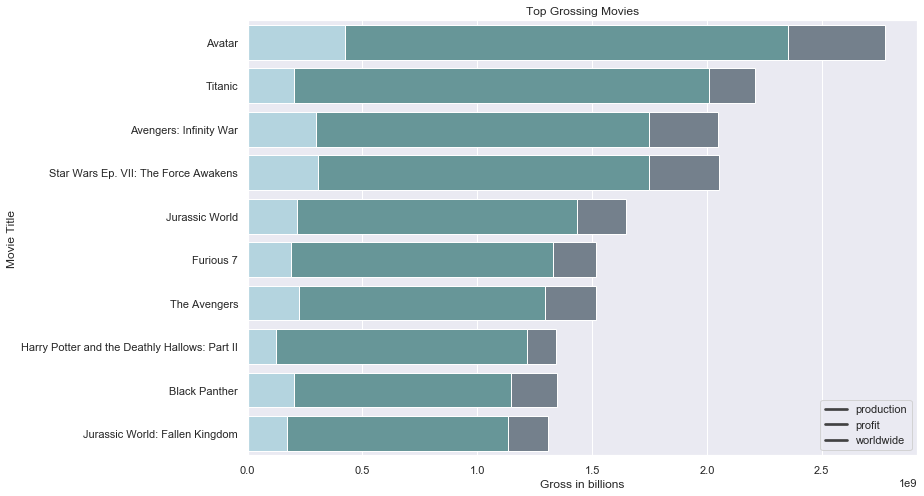

In [84]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'worldwide_gross', y = 'movie', data = movie_budgets.head(10), color = 'slategrey', )
sns.barplot(x = 'profits', y = 'movie', data = movie_budgets.head(10), color = 'cadetblue')
sns.barplot(x = 'production_budget', y = 'movie', data = movie_budgets.head(10), color = 'lightblue')

sns.set_style('darkgrid')
sns.set_context('notebook')
plt.xlabel('Gross in billions')
plt.ylabel('Movie Title')
plt.title('Top Grossing Movies')
plt.legend(loc = 'lower right', labels = ['production', 'profit', 'worldwide'],)



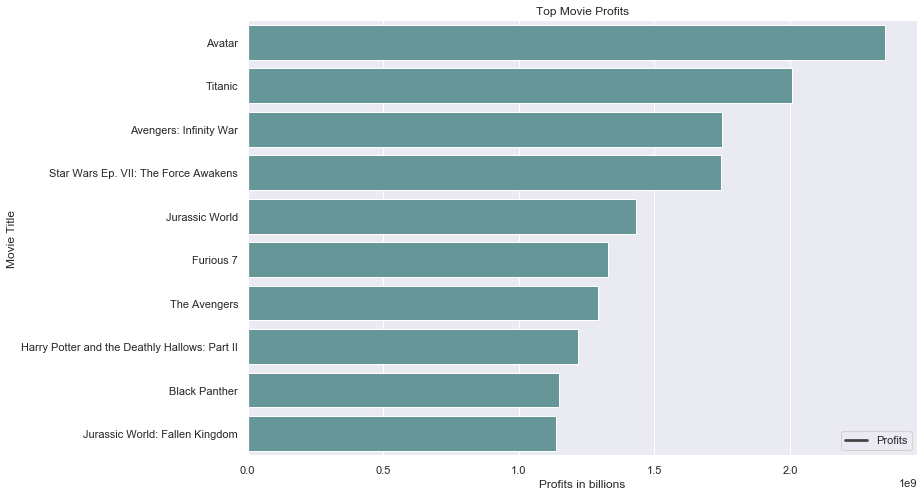

In [65]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'profits', y = 'movie', data = movie_budgets.head(10), color = 'cadetblue')
plt.xlabel('Profits in billions')
plt.ylabel('Movie Title')
plt.title('Top Movie Profits')
plt.legend(loc = 'lower right', labels = ['Profits'])